<div class="alert alert-block alert-info">
    <h1>[DataMining II] Text Analysis Practice- Project Gutenberg</h1>
</div>

Purpose: 

# 1. import Library

In [1]:
###import library
import nltk
from nltk import pos_tag
from urllib import request
from nltk import word_tokenize

from itertools import groupby as gb
from collections import Counter

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import matplotlib.pyplot as plt

from wordcloud import WordCloud

# 2. load book content

##### Two ways to get the book content from gutenberg
### (1). import nltk and utilize nltk corpus.gutenberg

In [2]:
#import nltk
#nltk.download('gutenberg')

In [3]:
#some downloaded books
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
raw_content_1 = nltk.corpus.gutenberg.words('austen-emma.txt')
raw_content_1

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

### (2). get the book by the url from Project Gutenberg (pick one book you wanted)
Alice's Adventures in Wonderland

In [5]:
#from urllib import request
url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [6]:
#avoid the beginning introduction and the ending license.
startraw= raw.find("CHAPTER I")
endraw= raw.rfind("END OF THE PROJECT GUTENBERG EBOOK")
raw_content_2 = raw[startraw:endraw]
raw_content_2

'CHAPTER I.     Down the Rabbit-Hole\r\n CHAPTER II.    The Pool of Tears\r\n CHAPTER III.   A Caucus-Race and a Long Tale\r\n CHAPTER IV.    The Rabbit Sends in a Little Bill\r\n CHAPTER V.     Advice from a Caterpillar\r\n CHAPTER VI.    Pig and Pepper\r\n CHAPTER VII.   A Mad Tea-Party\r\n CHAPTER VIII.  The Queen’s Croquet-Ground\r\n CHAPTER IX.    The Mock Turtle’s Story\r\n CHAPTER X.     The Lobster Quadrille\r\n CHAPTER XI.    Who Stole the Tarts?\r\n CHAPTER XII.   Alice’s Evidence\r\n\r\n\r\n\r\n\r\nCHAPTER I.\r\nDown the Rabbit-Hole\r\n\r\n\r\nAlice was beginning to get very tired of sitting by her sister on the\r\nbank, and of having nothing to do: once or twice she had peeped into\r\nthe book her sister was reading, but it had no pictures or\r\nconversations in it, “and what is the use of a book,” thought Alice\r\n“without pictures or conversations?”\r\n\r\nSo she was considering in her own mind (as well as she could, for the\r\nhot day made her feel very sleepy and stupid

# 3. Tokenized the book content

In [7]:
#from nltk import word_tokenize

def tokenize_lower_text(book_content):
    tokenized = word_tokenize(book_content)
    tokenized = [word.lower() for word in tokenized]  ## (Jake added) put every word into lower case
    
    return tokenized

tokenized = tokenize_lower_text(raw_content_2)

In [8]:
def parse_text(t):
    open_q = '“'
    close_q = "”"
    found_q = False # this will be used to break the while loop below
    # current will hold words until an open quote is found
    current = []
    
    parsed_dialog = [] 
    parsed_narrative = []
    length = len(t)
    i = 0

    while i < length:
        word = t[i]
        
        if word != open_q and word != close_q:
            current.append(word)

        elif word == open_q or word == close_q:
            parsed_narrative.append(current)

            current = []
            current.append(word)

            while found_q == False and i < length-1:
                i += 1
                if t[i] != close_q:
                    current.append(t[i])
                else:
                    current.append(t[i])
                    parsed_dialog.append(current)
                    current = []
                    found_q = True
        
        found_q = False
        i += 1
        
    return (parsed_dialog, parsed_narrative)


parsed_dialog, parsed_narrative = parse_text(tokenized)

In [9]:
parsed_dialog, parsed_narrative = parse_text(tokenized)

print("Sample of narrative list:", parsed_narrative[0])

Sample of narrative list: ['chapter', 'i', '.', 'down', 'the', 'rabbit-hole', 'chapter', 'ii', '.', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', '.', 'a', 'caucus-race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', '.', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v.', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', '.', 'pig', 'and', 'pepper', 'chapter', 'vii', '.', 'a', 'mad', 'tea-party', 'chapter', 'viii', '.', 'the', 'queen', '’', 's', 'croquet-ground', 'chapter', 'ix', '.', 'the', 'mock', 'turtle', '’', 's', 'story', 'chapter', 'x', '.', 'the', 'lobster', 'quadrille', 'chapter', 'xi', '.', 'who', 'stole', 'the', 'tarts', '?', 'chapter', 'xii', '.', 'alice', '’', 's', 'evidence', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 

<div class="alert alert-block alert-success"> 
    Can you see how the book content has been "TOKENIZED"?
</div>

### pick three characters and append to relative narrative array

In [10]:
p_list = ['alice', 'rabbit', 'queen']

In [11]:
#from itertools import groupby as gb

def split_sent(t):
    sent_list = []
    for sent in t:
        k = [list(sent) for i, sent in gb(sent, lambda item: item=='.')]
        for i in k:
            if len(i) > 1:
                sent_list.append(i)
    return (sent_list)

def protagonist(n, p_list):
    protagonist_narrative = {}
    for p in p_list:
        protagonist_narrative[p] = []

    for i in n:
        for word in i:
            
            if word in p_list:
                if word == p_list[0]:
                    protagonist_narrative['alice'].append(i)
                if word == p_list[1] :
                    protagonist_narrative['rabbit'].append(i)
                if word == p_list[2]:
                    protagonist_narrative['queen'].append(i)
                    
    return protagonist_narrative
        

narrative_split_sent = split_sent(parsed_narrative)
protagonist_dict = protagonist(narrative_split_sent, p_list)

# 4. POS tagging

In [12]:
#from nltk import pos_tag
def tagged_text(i):
    tagged = [pos_tag(word) for word in i]
    return tagged

In [13]:
def parse_tagged(protagonist_dict):
    tagged_dict = {}
    
    for k, v in protagonist_dict.items():
        tagged_dict[k] = tagged_text(v)
    return tagged_dict
    
# Call the function and save the results in a variable called tagged_dict.
tagged_dict = parse_tagged(protagonist_dict)

# Let's see what these look like by printing the first two sentences in each key.
for p in p_list:
        print("%s : " % p.title())
        print(tagged_dict[p][:2])

Alice : 
[[('alice', 'NN'), ('’', 'NNP'), ('s', 'VBD'), ('evidence', 'NN'), ('chapter', 'NN'), ('i', 'NN')], [('down', 'IN'), ('the', 'DT'), ('rabbit-hole', 'JJ'), ('alice', 'NN'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), (',', ','), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), (':', ':'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), (',', ','), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'NNS'), ('in', 'IN'), ('it', 'PRP'), (',', ',')]]
Rabbit : 
[[('the', 'DT'), ('rabbit', 'NN'), ('sends', 'VBZ'), ('in', 'IN'), ('a'

<div class="alert alert-block alert-success"> 
    Can you see how the book content has been "POS TAGGING" with each character and what those abbreviations represent? </br>
    Reference: https://www.guru99.com/pos-tagging-chunking-nltk.html
</div>

# 5. Collect Character-based verb/adverb

### (1). Origin without Lemmatization

In [14]:
#from collections import Counter

## (Jake added) Lemmatization for only verb not include adverb
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

def descriptor_verbs_adverbs(td):
    descriptor_words = {}
    descriptor_count = {}
    
    for k, v in td.items():
        # Create a key in the dictionary for the protagonist.
        descriptor_words[k] = []
        
        # Loop through each sentence in the list
        for s in v:
            for i in range(len(s)):
                
                # Cases of VERB - NOUN (e.g. "said Ron")
                if 'VB' in s[i][1]: 
                    try:
                        if s[i+1][0] == k:
                            descriptor_words[k].append(s[i][0])
                            
                            # Subset of cases where VERB - NOUN is followed by an ADVERB (e.g. "said Ron angrily")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                                    
                            except:
                                continue
                            
                    except:
                        continue
                        
                # Cases of NOUN - VERB (e.g. "Hermione explained")
                if 'NN' in s[i][1]: 
                    try:
                        if 'VB' in s[i+1][1]:
                            descriptor_words[k].append(s[i+1][0])
                            
                            cnt[word] += 1
                            # Subset of cases where NOUN - VERB is followed by an ADVERB (e.g. 
                            #"Hermione explained patiently")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                                    
                            except:
                                continue
                            
                    except:
                        continue
        
        descriptor_count[k] = Counter(descriptor_words[k])
      
        
    return (descriptor_words, descriptor_count)

In [15]:
descriptor_words, descriptor_count= descriptor_verbs_adverbs(tagged_dict)

### (2). With Lemmatization

In [16]:
#from collections import Counter

## (Jake added) Lemmatization for only verb not include adverb
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()

def descriptor_verbs_adverbs_Lemmatization(td):
    descriptor_words = {}
    descriptor_count = {}
    
    for k, v in td.items():
        # Create a key in the dictionary for the protagonist.
        descriptor_words[k] = []
        
        # Loop through each sentence in the list
        for s in v:
            for i in range(len(s)):
                
                # Cases of VERB - NOUN (e.g. "said Ron")
                if 'VB' in s[i][1]: 
                    try:
                        if s[i+1][0] == k:
                            descriptor_words[k].append(lemmatizer.lemmatize(s[i][0], pos="v")) ## (Jake added modified)
                            
                            # Subset of cases where VERB - NOUN is followed by an ADVERB (e.g. "said Ron angrily")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                                    
                            except:
                                continue
                            
                    except:
                        continue
                        
                # Cases of NOUN - VERB (e.g. "Hermione explained")
                if 'NN' in s[i][1]: 
                    try:
                        if 'VB' in s[i+1][1]:
                            descriptor_words[k].append(lemmatizer.lemmatize(s[i+1][0], pos="v")) ## (Jake added modified)
                            
                            cnt[word] += 1
                            # Subset of cases where NOUN - VERB is followed by an ADVERB (e.g. 
                            #"Hermione explained patiently")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                                    
                            except:
                                continue
                            
                    except:
                        continue
        
        descriptor_count[k] = Counter(descriptor_words[k])
      
        
    return (descriptor_words, descriptor_count)

In [17]:
descriptor_words_l, descriptor_count_l= descriptor_verbs_adverbs_Lemmatization(tagged_dict)

<div class="alert alert-block alert-success"> 
    Can you notice how to do "Lemmatization"?
</div>

# 6. Plot the result

### (1). character plot (v/adv)

In [18]:
#import matplotlib.pyplot as plt
# from PIL import Image
#import wordcloud
#from wordcloud import WordCloud
#generate the word cloud with parameters

wc = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =5, 
               max_font_size=40, 
               relative_scaling = 0.4, 
               normalize_plurals= True,
               collocations=False) ## (Jake added) - for not showing duplicate word

fig_sz = (20,20)

******************** Alice ********************


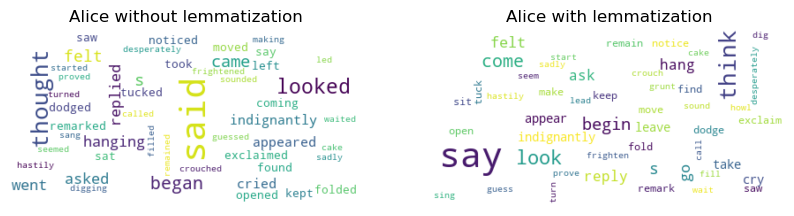

******************** rabbit ********************


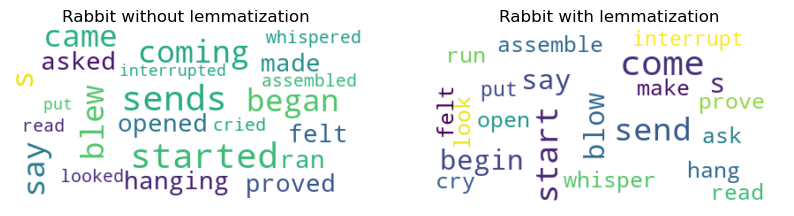

******************** Queen ********************


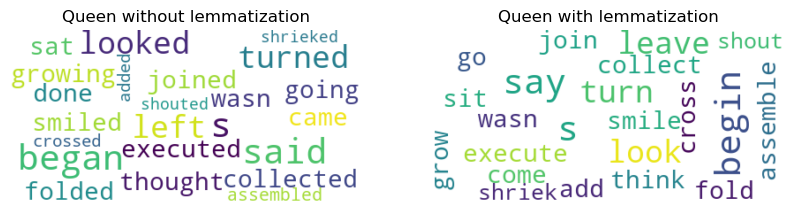

In [19]:
#import matplotlib.pyplot as plt
# from PIL import Image
#import wordcloud
#from wordcloud import WordCloud
#generate the word cloud with parameters

#alice
plt.figure(figsize=(10, 5))
print ("*" * 20, "Alice", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(descriptor_words['alice']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Alice without lemmatization')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(descriptor_words_l['alice']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Alice with lemmatization')
plt.axis("off")
plt.show()

#rabbit
plt.figure(figsize=(10, 5))
print ("*" * 20, "rabbit", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(descriptor_words['rabbit']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Rabbit without lemmatization')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(descriptor_words_l['rabbit']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Rabbit with lemmatization')
plt.axis("off")
plt.show()


#queen
plt.figure(figsize=(10, 5))
print ("*" * 20, "Queen", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(descriptor_words['queen']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Queen without lemmatization')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(descriptor_words_l['queen']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Queen with lemmatization')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-success"> 
    Can you understand what "Lemmatization" is and notice how "Lemmatization" affects?
</div>

### (2). character_exclusive plot (v/adv)

In [20]:
def character_exclusive(dc, char):

    char_excl = []
    other_two = []
    
    for k, v in dc.items():
        if k != char:
            words = list(v.keys())
            other_two.extend(words)
            
    other_two = set(other_two)

    for word in list(dc[char].keys()):
        if word not in other_two:
            char_excl.append(word)
    
    return char_excl

In [21]:
# This function calls character_exclusive and turns the results into a list we can use to make the word cloud

def only_char_list(dc, char):
    excl_words = character_exclusive(dc, char)
    word_cloud_list = []
    for word in excl_words:
        multiplier = dc[char][word]
        word_cloud_list.extend([word for x in range(multiplier)])

    return word_cloud_list

In [22]:
#Origin
alice_excl = only_char_list(descriptor_count, 'alice')
rabbit_excl = only_char_list(descriptor_count, 'rabbit')
queen_excl = only_char_list(descriptor_count, 'queen')

#with lemmatization
alice_excl_l = only_char_list(descriptor_count_l, 'alice')
rabbit_excl_l = only_char_list(descriptor_count_l, 'rabbit')
queen_excl_l = only_char_list(descriptor_count_l, 'queen')

******************** Alice ********************


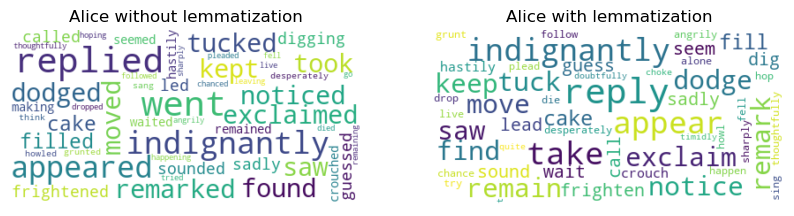

******************** Rabbit ********************


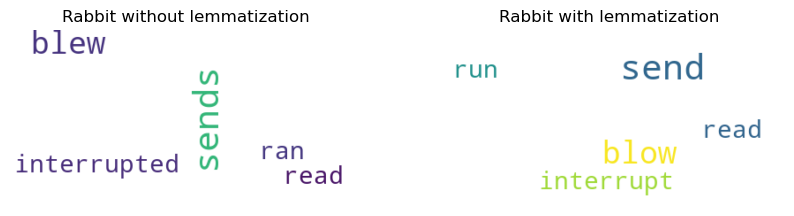

******************** Queen ********************


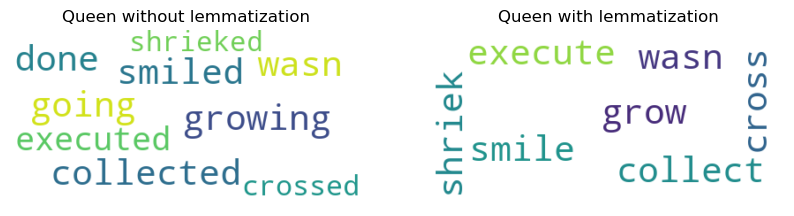

In [23]:
# and now for the word clouds!

#Alice only
plt.figure(figsize=(10, 5))
print ("*" * 20, "Alice", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(alice_excl))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Alice without lemmatization')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(alice_excl_l))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Alice with lemmatization')
plt.axis("off")
plt.show()

#Rabbit only
plt.figure(figsize=(10, 5))
print ("*" * 20, "Rabbit", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(rabbit_excl))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Rabbit without lemmatization')
plt.axis("off")


plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(rabbit_excl_l))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Rabbit with lemmatization')
plt.axis("off")

plt.show()

#Queen
plt.figure(figsize=(10, 5))
print ("*" * 20, "Queen", "*" * 20)
plt.subplot(1, 2, 1)
wordcloud1=wc.generate(' '.join(queen_excl))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Queen without lemmatization')
plt.axis("off")


plt.subplot(1, 2, 2)
wordcloud2=wc.generate(' '.join(queen_excl_l))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Queen with lemmatization')
plt.axis("off")

plt.show()

<div class="alert alert-block alert-success"> 
    Can you notice that after doing "Lemmtaization," the character's exclusive words have been reduced?
</div>

<div class="alert alert-block alert-success"> 
    [REFLECTION]: What's your finding from these results?
</div>